In [1]:
import pandas as pd
import numpy as np  


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import sklearn


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import optuna

import xgboost as xgb


In [2]:
solar_original_train = pd.read_csv('../data/external/solar_train.csv')
solar_original_train.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,9/29/2016 12:00:00 AM,08:50:23,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00
1,1481799902,12/15/2016 12:00:00 AM,01:05:02,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00
2,1478339417,11/4/2016 12:00:00 AM,23:50:17,1.21,47,30.49,33,168.20,5.62,06:25:00,17:47:00
3,1472887208,9/2/2016 12:00:00 AM,21:20:08,1.67,54,30.46,101,152.60,3.37,06:07:00,18:37:00
4,1478724901,11/9/2016 12:00:00 AM,10:55:01,839.78,62,30.47,36,291.95,7.87,06:28:00,17:45:00


In [3]:
sol_phys_train = pd.read_csv('../data/interim/solar_pro1_train.csv')
sol_phys_train = sol_phys_train.drop('Unnamed: 0', axis=1)
sol_phys_train.head()

,Radiation,Temperature,Humidity,WindDirection(Degrees),Speed,Time,SunTime,DayOfYear,DayOfWeek,WeekOfYear,Month,TimeSunRise,TimeSunSet
0,634.99,289.26,41,0.0416,3.02,0.368322,0.500000,273,3,39,9,0.259028,0.759028
1,1.27,275.93,70,0.5762,2.51,0.045162,0.455556,350,3,50,12,0.284722,0.740278
2,1.21,281.48,33,0.4672,2.51,0.993252,0.473611,309,4,44,11,0.267361,0.740972
3,1.67,285.37,101,0.4239,1.51,0.888981,0.520833,246,4,35,9,0.254861,0.775694
4,839.78,289.82,36,0.8110,3.52,0.454873,0.470139,314,2,45,11,0.269444,0.739583


In [4]:
sol_phys_train.drop(columns=['Speed','Month'], inplace=True)

In [5]:
sol_phys_train.head()

,Radiation,Temperature,Humidity,WindDirection(Degrees),Time,SunTime,DayOfYear,DayOfWeek,WeekOfYear,TimeSunRise,TimeSunSet
0,634.99,289.26,41,0.0416,0.368322,0.500000,273,3,39,0.259028,0.759028
1,1.27,275.93,70,0.5762,0.045162,0.455556,350,3,50,0.284722,0.740278
2,1.21,281.48,33,0.4672,0.993252,0.473611,309,4,44,0.267361,0.740972
3,1.67,285.37,101,0.4239,0.888981,0.520833,246,4,35,0.254861,0.775694
4,839.78,289.82,36,0.8110,0.454873,0.470139,314,2,45,0.269444,0.739583


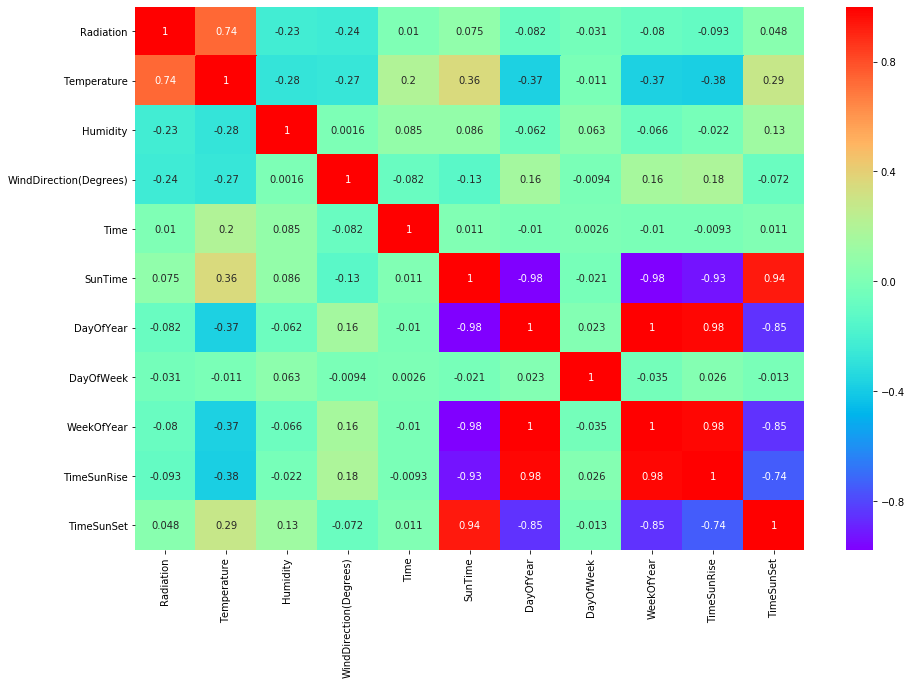

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(sol_phys_train.corr(), cmap='rainbow', annot=True)
plt.show()

In [7]:
sol_phys_train.to_csv('../data/interim/solar_pro2_train.csv')

<br>
<br>
<br>

In [8]:
sol_phys_test = pd.read_csv('../data/interim/solar_pro1_test.csv')
sol_phys_test = sol_phys_test.drop('Unnamed: 0', axis=1)
sol_phys_test.head()

,Temperature,Humidity,WindDirection(Degrees),Speed,Time,SunTime,DayOfYear,DayOfWeek,WeekOfYear,Month,TimeSunRise,TimeSunSet
0,288.15,44,0.8685,1.51,0.399387,0.470139,314,2,45,11,0.269444,0.739583
1,288.15,83,0.1056,3.02,0.503507,0.510417,260,4,37,9,0.256944,0.767361
2,281.48,78,0.5934,2.51,0.180799,0.490972,284,0,41,10,0.261111,0.752083
3,280.37,98,0.4906,2.01,0.285370,0.456250,346,6,49,12,0.282639,0.738889
4,280.37,34,0.4886,3.02,0.198113,0.479861,300,2,43,10,0.264583,0.744444


In [9]:
sol_phys_test.drop(columns=['Speed','Month'], inplace=True)

In [10]:
sol_phys_test.head()

,Temperature,Humidity,WindDirection(Degrees),Time,SunTime,DayOfYear,DayOfWeek,WeekOfYear,TimeSunRise,TimeSunSet
0,288.15,44,0.8685,0.399387,0.470139,314,2,45,0.269444,0.739583
1,288.15,83,0.1056,0.503507,0.510417,260,4,37,0.256944,0.767361
2,281.48,78,0.5934,0.180799,0.490972,284,0,41,0.261111,0.752083
3,280.37,98,0.4906,0.285370,0.456250,346,6,49,0.282639,0.738889
4,280.37,34,0.4886,0.198113,0.479861,300,2,43,0.264583,0.744444


In [11]:
sol_phys_test.to_csv('../data/interim/solar_pro2_test.csv')

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

In [16]:
sol_pro3_train = pd.read_csv('../data/interim/solar_pro2_train.csv')
sol_pro3_train = sol_pro3_train.drop('Unnamed: 0', axis=1)
sol_pro3_train.head()

,Radiation,Temperature,Humidity,WindDirection(Degrees),Time,SunTime,DayOfYear,DayOfWeek,WeekOfYear,TimeSunRise,TimeSunSet
0,634.99,289.26,41,0.0416,0.368322,0.500000,273,3,39,0.259028,0.759028
1,1.27,275.93,70,0.5762,0.045162,0.455556,350,3,50,0.284722,0.740278
2,1.21,281.48,33,0.4672,0.993252,0.473611,309,4,44,0.267361,0.740972
3,1.67,285.37,101,0.4239,0.888981,0.520833,246,4,35,0.254861,0.775694
4,839.78,289.82,36,0.8110,0.454873,0.470139,314,2,45,0.269444,0.739583


In [17]:
sol_pro3_train.drop(columns=['DayOfWeek','TimeSunRise'], inplace=True)
sol_pro3_train.head()

,Radiation,Temperature,Humidity,WindDirection(Degrees),Time,SunTime,DayOfYear,WeekOfYear,TimeSunSet
0,634.99,289.26,41,0.0416,0.368322,0.500000,273,39,0.759028
1,1.27,275.93,70,0.5762,0.045162,0.455556,350,50,0.740278
2,1.21,281.48,33,0.4672,0.993252,0.473611,309,44,0.740972
3,1.67,285.37,101,0.4239,0.888981,0.520833,246,35,0.775694
4,839.78,289.82,36,0.8110,0.454873,0.470139,314,45,0.739583


In [18]:
sol_pro3_train['DayFraction'] = sol_pro3_train['Time']
sol_pro3_train = sol_pro3_train.drop('Time', axis=1)
sol_pro3_train.head()

,Radiation,Temperature,Humidity,WindDirection(Degrees),SunTime,DayOfYear,WeekOfYear,TimeSunSet,DayFraction
0,634.99,289.26,41,0.0416,0.500000,273,39,0.759028,0.368322
1,1.27,275.93,70,0.5762,0.455556,350,50,0.740278,0.045162
2,1.21,281.48,33,0.4672,0.473611,309,44,0.740972,0.993252
3,1.67,285.37,101,0.4239,0.520833,246,35,0.775694,0.888981
4,839.78,289.82,36,0.8110,0.470139,314,45,0.739583,0.454873


In [30]:

sol_pro3_train['YearFraction'] = (sol_pro3_train['DayOfYear'] + solar_original_train['Time'].apply(lambda x:  pd.Period(x, freq='h').hour/24))/365
sol_pro3_train.head()


,Radiation,Temperature,Humidity,WindDirection(Degrees),SunTime,DayOfYear,WeekOfYear,TimeSunSet,DayFraction,YearFraction
0,634.99,289.26,41,0.0416,0.500000,273,39,0.759028,0.368322,0.748858
1,1.27,275.93,70,0.5762,0.455556,350,50,0.740278,0.045162,0.959018
2,1.21,281.48,33,0.4672,0.473611,309,44,0.740972,0.993252,0.849201
3,1.67,285.37,101,0.4239,0.520833,246,35,0.775694,0.888981,0.676370
4,839.78,289.82,36,0.8110,0.470139,314,45,0.739583,0.454873,0.861416


In [31]:
sol_pro3_train = sol_pro3_train.drop('DayOfYear', axis=1)
sol_pro3_train.head()

,Radiation,Temperature,Humidity,WindDirection(Degrees),SunTime,WeekOfYear,TimeSunSet,DayFraction,YearFraction
0,634.99,289.26,41,0.0416,0.500000,39,0.759028,0.368322,0.748858
1,1.27,275.93,70,0.5762,0.455556,50,0.740278,0.045162,0.959018
2,1.21,281.48,33,0.4672,0.473611,44,0.740972,0.993252,0.849201
3,1.67,285.37,101,0.4239,0.520833,35,0.775694,0.888981,0.676370
4,839.78,289.82,36,0.8110,0.470139,45,0.739583,0.454873,0.861416


In [34]:

sol_pro3_train['Quartile'] = solar_original_train['Data'].apply(lambda x:  pd.Period(x.split(" ")[0], freq='Q').quarter)
sol_pro3_train.head()


,Radiation,Temperature,Humidity,WindDirection(Degrees),SunTime,WeekOfYear,TimeSunSet,DayFraction,YearFraction,Quartile
0,634.99,289.26,41,0.0416,0.500000,39,0.759028,0.368322,0.748858,3
1,1.27,275.93,70,0.5762,0.455556,50,0.740278,0.045162,0.959018,4
2,1.21,281.48,33,0.4672,0.473611,44,0.740972,0.993252,0.849201,4
3,1.67,285.37,101,0.4239,0.520833,35,0.775694,0.888981,0.676370,3
4,839.78,289.82,36,0.8110,0.470139,45,0.739583,0.454873,0.861416,4


In [35]:
sol_pro3_train.to_csv('../data/interim/solar_pro3_train.csv')

In [41]:
solar_original_test = pd.read_csv('../data/external/solar_test.csv')
solar_original_test.head()

,id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1478720107,11/9/2016 12:00:00 AM,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00
1,1,1474063503,9/16/2016 12:00:00 AM,12:05:03,59,30.48,83,38.01,6.75,06:10:00,18:25:00
2,2,1476109221,10/10/2016 12:00:00 AM,04:20:21,47,30.39,78,213.62,5.62,06:16:00,18:03:00
3,3,1481475056,12/11/2016 12:00:00 AM,06:50:56,45,30.40,98,176.63,4.50,06:47:00,17:44:00
4,4,1477493117,10/26/2016 12:00:00 AM,04:45:17,45,30.40,34,175.89,6.75,06:21:00,17:52:00


In [38]:
sol_pro3_test = pd.read_csv('../data/interim/solar_pro2_test.csv')
sol_pro3_test = sol_pro3_test.drop('Unnamed: 0', axis=1)
sol_pro3_test.head()

,Temperature,Humidity,WindDirection(Degrees),Time,SunTime,DayOfYear,DayOfWeek,WeekOfYear,TimeSunRise,TimeSunSet
0,288.15,44,0.8685,0.399387,0.470139,314,2,45,0.269444,0.739583
1,288.15,83,0.1056,0.503507,0.510417,260,4,37,0.256944,0.767361
2,281.48,78,0.5934,0.180799,0.490972,284,0,41,0.261111,0.752083
3,280.37,98,0.4906,0.285370,0.456250,346,6,49,0.282639,0.738889
4,280.37,34,0.4886,0.198113,0.479861,300,2,43,0.264583,0.744444


In [39]:
sol_pro3_test.drop(columns=['DayOfWeek','TimeSunRise'], inplace=True)
sol_pro3_test.head()

,Temperature,Humidity,WindDirection(Degrees),Time,SunTime,DayOfYear,WeekOfYear,TimeSunSet
0,288.15,44,0.8685,0.399387,0.470139,314,45,0.739583
1,288.15,83,0.1056,0.503507,0.510417,260,37,0.767361
2,281.48,78,0.5934,0.180799,0.490972,284,41,0.752083
3,280.37,98,0.4906,0.285370,0.456250,346,49,0.738889
4,280.37,34,0.4886,0.198113,0.479861,300,43,0.744444


In [40]:
sol_pro3_test['DayFraction'] = sol_pro3_test['Time']
sol_pro3_test = sol_pro3_test.drop('Time', axis=1)
sol_pro3_test.head()

,Temperature,Humidity,WindDirection(Degrees),SunTime,DayOfYear,WeekOfYear,TimeSunSet,DayFraction
0,288.15,44,0.8685,0.470139,314,45,0.739583,0.399387
1,288.15,83,0.1056,0.510417,260,37,0.767361,0.503507
2,281.48,78,0.5934,0.490972,284,41,0.752083,0.180799
3,280.37,98,0.4906,0.456250,346,49,0.738889,0.285370
4,280.37,34,0.4886,0.479861,300,43,0.744444,0.198113


In [42]:

sol_pro3_test['YearFraction'] = (sol_pro3_test['DayOfYear'] + solar_original_test['Time'].apply(lambda x:  pd.Period(x, freq='h').hour/24))/365
sol_pro3_test.head()


,Temperature,Humidity,WindDirection(Degrees),SunTime,DayOfYear,WeekOfYear,TimeSunSet,DayFraction,YearFraction
0,288.15,44,0.8685,0.470139,314,45,0.739583,0.399387,0.861301
1,288.15,83,0.1056,0.510417,260,37,0.767361,0.503507,0.713699
2,281.48,78,0.5934,0.490972,284,41,0.752083,0.180799,0.778539
3,280.37,98,0.4906,0.456250,346,49,0.738889,0.285370,0.948630
4,280.37,34,0.4886,0.479861,300,43,0.744444,0.198113,0.822374


In [43]:

sol_pro3_test = sol_pro3_test.drop('DayOfYear', axis=1)
sol_pro3_test.head()


,Temperature,Humidity,WindDirection(Degrees),SunTime,WeekOfYear,TimeSunSet,DayFraction,YearFraction
0,288.15,44,0.8685,0.470139,45,0.739583,0.399387,0.861301
1,288.15,83,0.1056,0.510417,37,0.767361,0.503507,0.713699
2,281.48,78,0.5934,0.490972,41,0.752083,0.180799,0.778539
3,280.37,98,0.4906,0.456250,49,0.738889,0.285370,0.948630
4,280.37,34,0.4886,0.479861,43,0.744444,0.198113,0.822374


In [44]:

sol_pro3_test['Quartile'] = solar_original_test['Data'].apply(lambda x:  pd.Period(x.split(" ")[0], freq='Q').quarter)
sol_pro3_test.head()


,Temperature,Humidity,WindDirection(Degrees),SunTime,WeekOfYear,TimeSunSet,DayFraction,YearFraction,Quartile
0,288.15,44,0.8685,0.470139,45,0.739583,0.399387,0.861301,4
1,288.15,83,0.1056,0.510417,37,0.767361,0.503507,0.713699,3
2,281.48,78,0.5934,0.490972,41,0.752083,0.180799,0.778539,4
3,280.37,98,0.4906,0.456250,49,0.738889,0.285370,0.948630,4
4,280.37,34,0.4886,0.479861,43,0.744444,0.198113,0.822374,4


In [58]:
sol_pro3_test.to_csv('../data/interim/solar_pro3_test.csv')

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

In [46]:
sol_pro4_train = pd.read_csv('../data/interim/solar_pro3_train.csv')
sol_pro4_train = sol_pro4_train.drop('Unnamed: 0', axis=1)
sol_pro4_train.head()

,Radiation,Temperature,Humidity,WindDirection(Degrees),SunTime,WeekOfYear,TimeSunSet,DayFraction,YearFraction,Quartile
0,634.99,289.26,41,0.0416,0.500000,39,0.759028,0.368322,0.748858,3
1,1.27,275.93,70,0.5762,0.455556,50,0.740278,0.045162,0.959018,4
2,1.21,281.48,33,0.4672,0.473611,44,0.740972,0.993252,0.849201,4
3,1.67,285.37,101,0.4239,0.520833,35,0.775694,0.888981,0.676370,3
4,839.78,289.82,36,0.8110,0.470139,45,0.739583,0.454873,0.861416,4


In [47]:
sol_pro4_train.drop(columns=['WeekOfYear','Quartile'], inplace=True)
sol_pro4_train.head()

,Radiation,Temperature,Humidity,WindDirection(Degrees),SunTime,TimeSunSet,DayFraction,YearFraction
0,634.99,289.26,41,0.0416,0.500000,0.759028,0.368322,0.748858
1,1.27,275.93,70,0.5762,0.455556,0.740278,0.045162,0.959018
2,1.21,281.48,33,0.4672,0.473611,0.740972,0.993252,0.849201
3,1.67,285.37,101,0.4239,0.520833,0.775694,0.888981,0.676370
4,839.78,289.82,36,0.8110,0.470139,0.739583,0.454873,0.861416


In [75]:
sol_pro4_train.index = pd.to_datetime(solar_original_train['UNIXTime'], unit='s')
sol_pro4_train.sort_index(inplace=True)
sol_pro4_train.head()

,Radiation,Temperature,Humidity,WindDirection(Degrees),SunTime,TimeSunSet,DayFraction,YearFraction
UNIXTime,,,,,,,,
2016-09-01 10:00:08,228.26,287.04,93,0.0024,0.514583,0.770833,0.632153,0.697603
2016-09-01 10:05:10,1.22,280.37,93,0.2611,0.458333,0.738194,0.837222,0.931050
2016-09-01 10:25:05,566.83,287.59,52,0.1135,0.500000,0.759028,0.673866,0.749772
2016-09-01 10:30:09,447.70,284.26,96,0.1250,0.476389,0.742361,0.385625,0.836644
2016-09-01 10:45:04,1.22,283.71,86,0.4854,0.490972,0.752083,0.972465,0.783447


In [76]:
sol_pro4_train.to_csv('../data/interim/solar_pro4_train.csv')

In [59]:
sol_pro4_test = pd.read_csv('../data/interim/solar_pro3_test.csv')
sol_pro4_test = sol_pro4_test.drop('Unnamed: 0', axis=1)
sol_pro4_test.head()

,Temperature,Humidity,WindDirection(Degrees),SunTime,WeekOfYear,TimeSunSet,DayFraction,YearFraction,Quartile
0,288.15,44,0.8685,0.470139,45,0.739583,0.399387,0.861301,4
1,288.15,83,0.1056,0.510417,37,0.767361,0.503507,0.713699,3
2,281.48,78,0.5934,0.490972,41,0.752083,0.180799,0.778539,4
3,280.37,98,0.4906,0.456250,49,0.738889,0.285370,0.948630,4
4,280.37,34,0.4886,0.479861,43,0.744444,0.198113,0.822374,4


In [60]:
sol_pro4_test.drop(columns=['WeekOfYear','Quartile'], inplace=True)
sol_pro4_test.head()

,Temperature,Humidity,WindDirection(Degrees),SunTime,TimeSunSet,DayFraction,YearFraction
0,288.15,44,0.8685,0.470139,0.739583,0.399387,0.861301
1,288.15,83,0.1056,0.510417,0.767361,0.503507,0.713699
2,281.48,78,0.5934,0.490972,0.752083,0.180799,0.778539
3,280.37,98,0.4906,0.456250,0.738889,0.285370,0.948630
4,280.37,34,0.4886,0.479861,0.744444,0.198113,0.822374


In [74]:
sol_pro4_test.index = pd.to_datetime(solar_original_test['UNIXTime'], unit='s')
sol_pro4_test.sort_index(inplace=True)
sol_pro4_test.head()

,Temperature,Humidity,WindDirection(Degrees),SunTime,TimeSunSet,DayFraction,YearFraction
UNIXTime,,,,,,,
2016-09-01 10:20:06,283.71,103,0.3946,0.521528,0.776389,0.013958,0.671233
2016-09-01 11:10:06,283.71,103,0.4391,0.521528,0.776389,0.048681,0.671347
2016-09-01 11:15:14,283.71,103,0.1102,0.521528,0.776389,0.052245,0.671347
2016-09-01 11:25:06,283.71,103,0.3123,0.521528,0.776389,0.059097,0.671347
2016-09-01 11:55:04,283.71,103,0.1835,0.521528,0.776389,0.079907,0.671347


In [77]:
sol_pro4_test.to_csv('../data/interim/solar_pro4_test.csv')

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [12]:
sol4 = pd.read_csv('../data/interim/solar_pro4_train.csv')

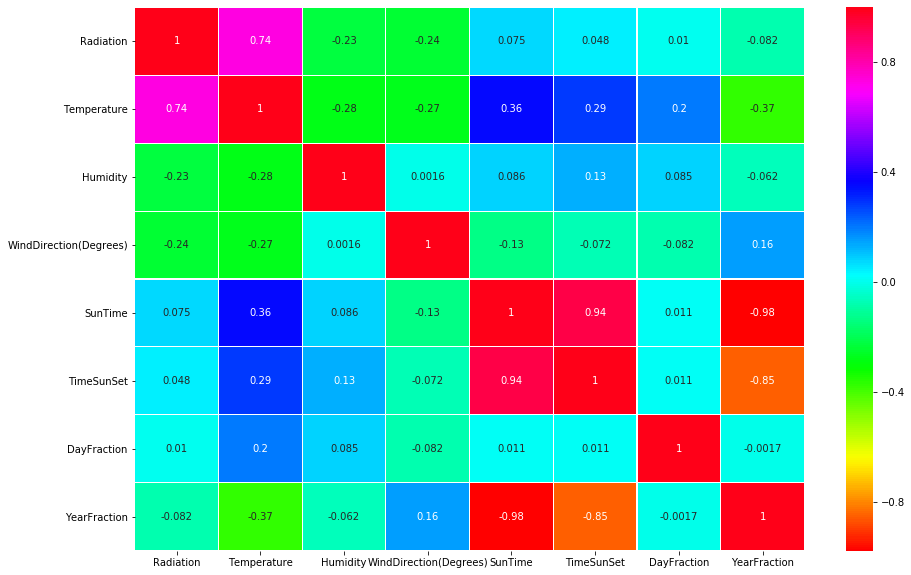

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(sol4.corr(), cmap = 'hsv', annot=True, linewidths=0.10)
plt.show()